# **Breast Cancer Detection Machine learning Model**

**Import Required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Data collection**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
def find_nulls(data:pd.DataFrame) -> pd.DataFrame:
    temp = {'columns':[],'nulls':[],'nulls_%':[],'unique':[]}
    nulls = data.isnull().sum()
    temp['columns'] = nulls.axes[0]
    temp['nulls'] = nulls.values
    temp['nulls_%'] = nulls.values*100/data.shape[0]
    for i in nulls.axes[0]:
        temp['unique'].append(data[i].unique().shape[0])
    temp = pd.DataFrame(temp)
    return temp.sort_values('nulls')
find_nulls(data).style.background_gradient(cmap='Blues') #finding and removing null values

,columns,nulls,nulls_%,unique
0,id,0,0.000000,569
29,concave points_worst,0,0.000000,492
28,concavity_worst,0,0.000000,539
27,compactness_worst,0,0.000000,529
26,smoothness_worst,0,0.000000,411
25,area_worst,0,0.000000,544
24,perimeter_worst,0,0.000000,514
23,texture_worst,0,0.000000,511
22,radius_worst,0,0.000000,457
21,fractal_dimension_se,0,0.000000,545


**Corleation Graph**

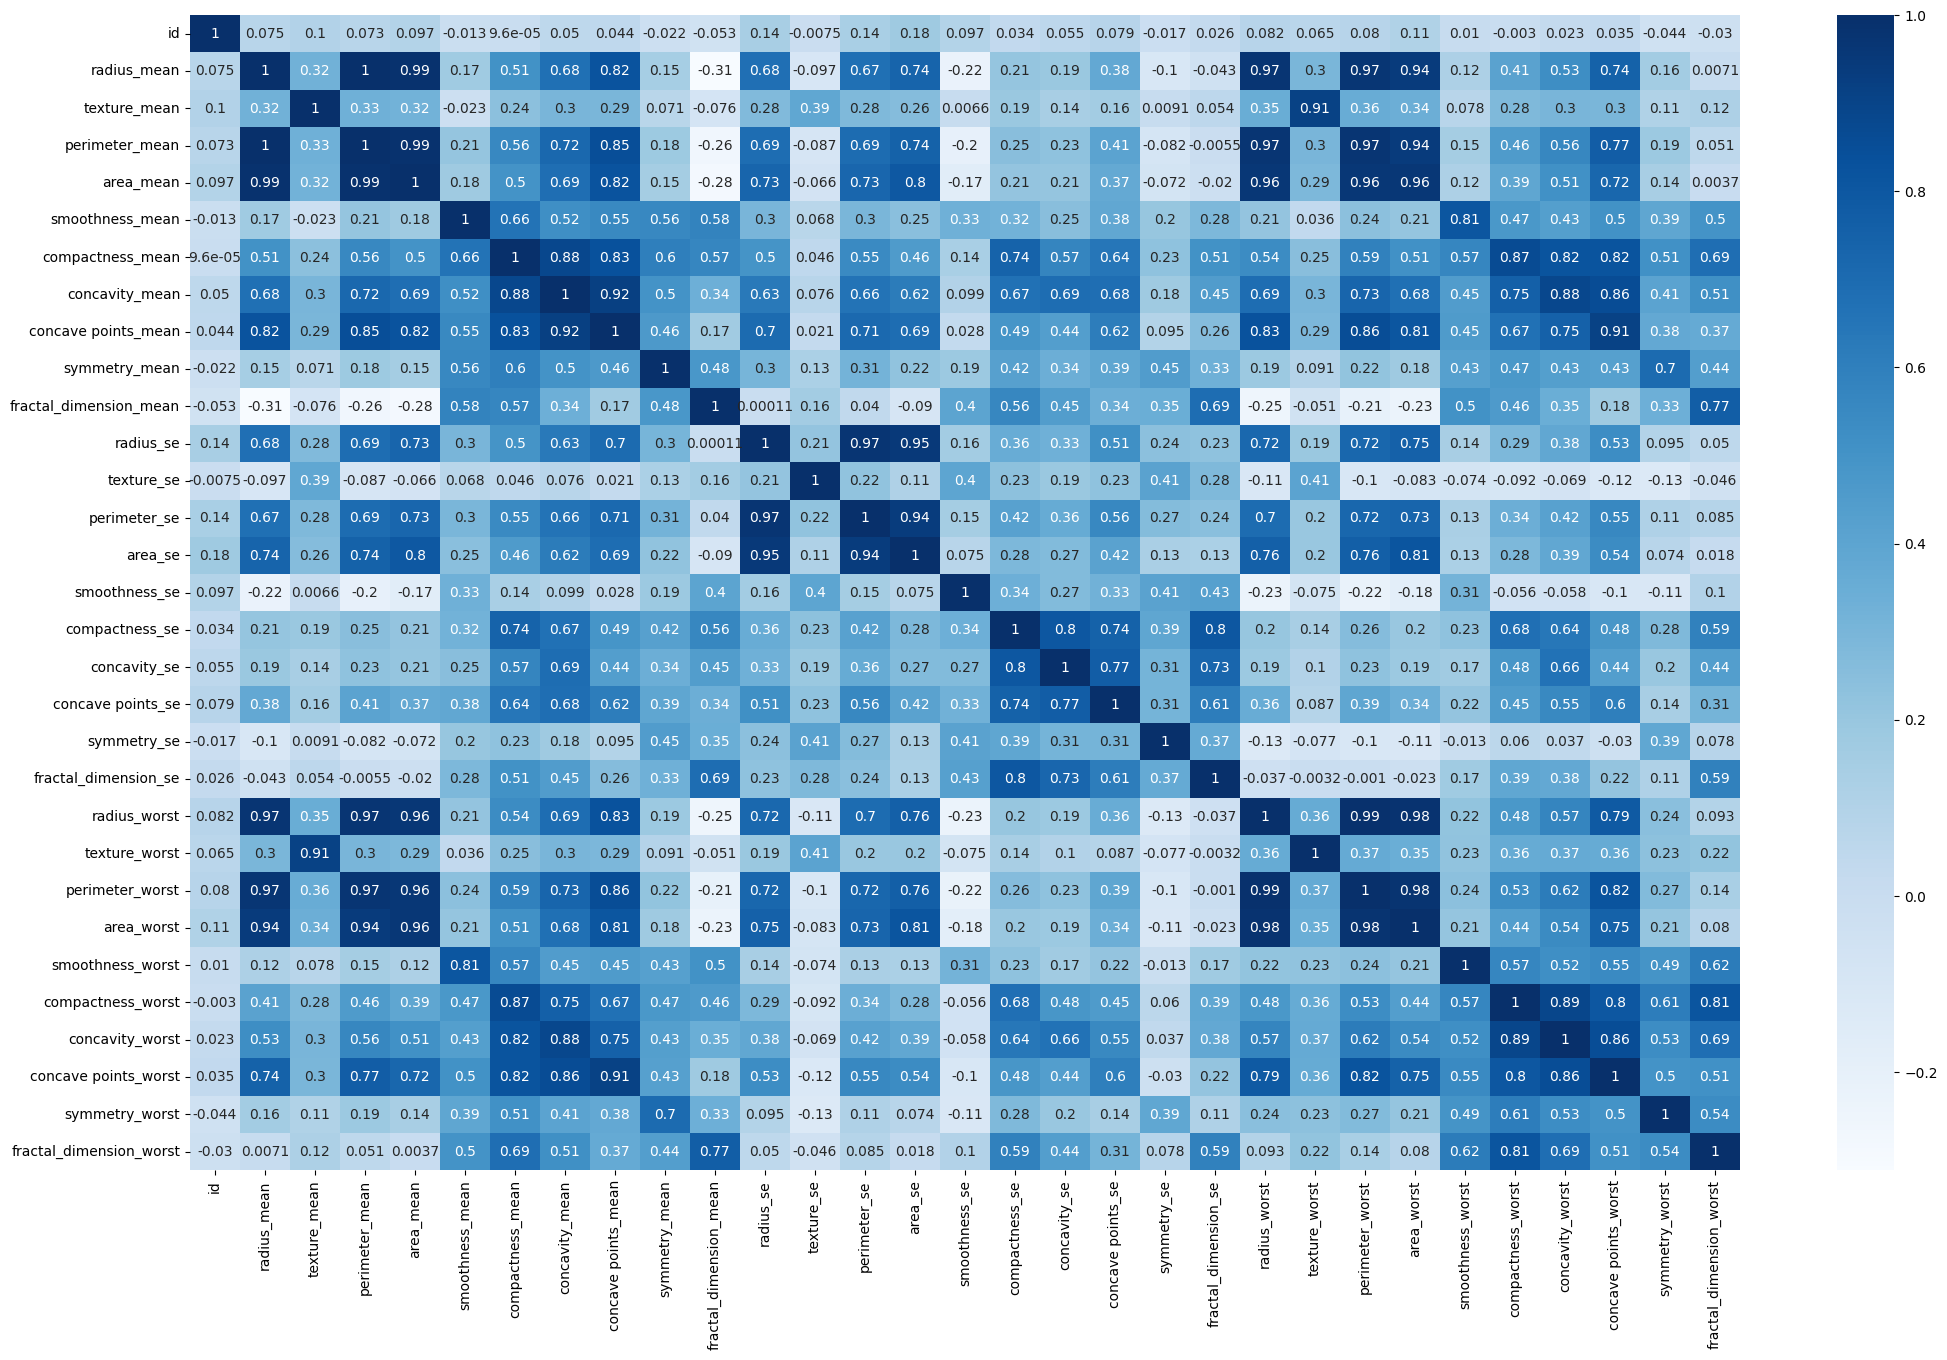

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.drop(columns=['diagnosis']).corr(),annot=True,cmap='Blues')
plt.show()

In [ ]:
cols = ['area_mean','perimeter_mean','area_worst','perimeter_worst','perimeter_se','area_se']
def annova(data:pd.DataFrame,cols:list[str],output:str):
    for col in cols:
        SSB,SSW = 0,0
        mean = data[col].mean()
        for i in data[output].unique():
            temp = data[data[output] == i][col]
            SSB += temp.shape[0]*(mean - temp.mean())**2
            SSW += np.sum((temp-temp.mean())**2)
        db = data[output].unique().shape[0] - 1
        dw = data[col].shape[0] - data[output].unique().shape[0]
        critical = (SSB/db) / (SSW/dw)
        if critical < f.ppf(0.95,db,dw):
            print("failed to reject null hypothesis between",col,'and',output)
annova(data,data.columns.drop(cols).drop('diagnosis'),'diagnosis')

failed to reject null hypothesis between id and diagnosis
failed to reject null hypothesis between fractal_dimension_mean and diagnosis
failed to reject null hypothesis between texture_se and diagnosis
failed to reject null hypothesis between smoothness_se and diagnosis
failed to reject null hypothesis between symmetry_se and diagnosis
failed to reject null hypothesis between fractal_dimension_se and diagnosis


In [ ]:
annova_cols = ['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se']
base = RandomForestClassifier(max_features='sqrt')
base.fit(data[data.columns.drop(cols).drop('diagnosis')].to_numpy(),data['diagnosis'].to_numpy())

RandomForestClassifier()

In [ ]:
feature_importance = {"columns":data.columns.drop(cols).drop('diagnosis'),"score":base.feature_importances_*100}
feature_importance = pd.DataFrame(feature_importance).sort_values('score',ascending=False)
feature_importance.style.background_gradient(cmap='Blues')   #finding and dispalying import and highly corlated features

,columns,score
22,concave points_worst,19.722843
17,radius_worst,15.877015
6,concave points_mean,13.810253
1,radius_mean,10.713050
21,concavity_worst,7.959907
5,concavity_mean,6.658796
9,radius_se,4.436061
4,compactness_mean,2.999859
18,texture_worst,2.469740
2,texture_mean,2.417447


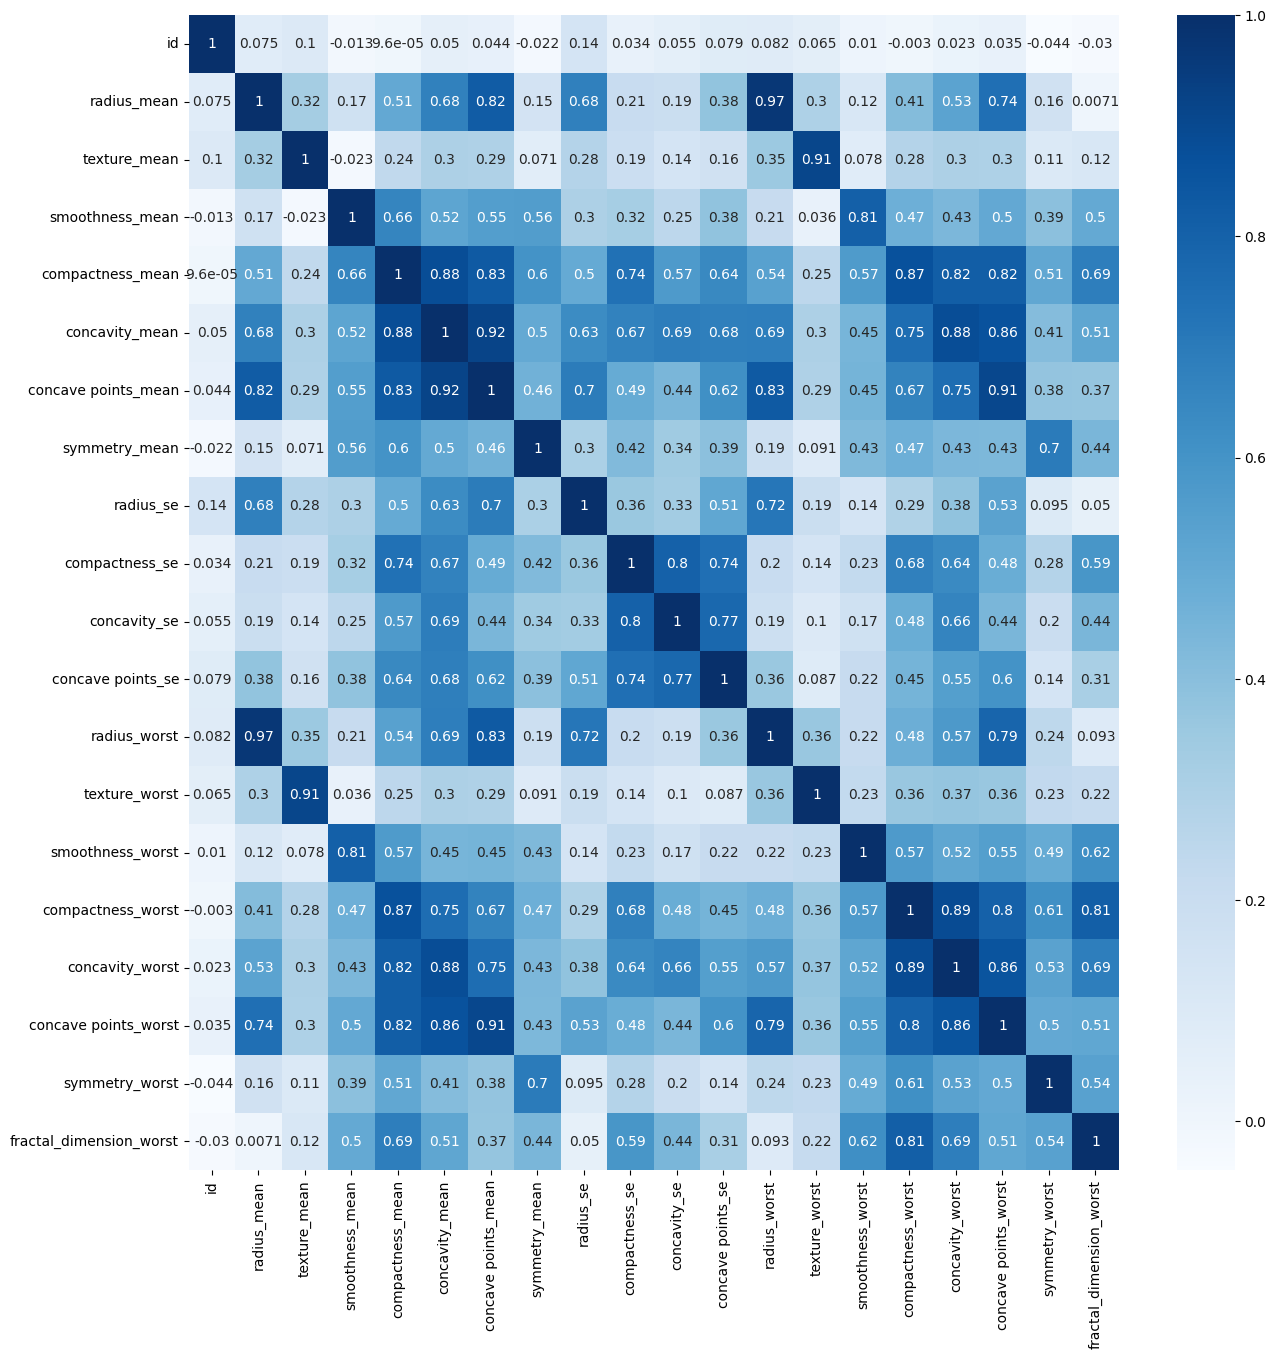

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data[data.columns.drop(cols).drop('diagnosis').drop(annova_cols)].corr(),annot=True,cmap='Blues')
plt.show() # corelation graph

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
x_train,x_test,y_train,y_test = train_test_split(data[data.columns.drop(cols).drop(annova_cols).drop('diagnosis')].to_numpy(),data['diagnosis'].to_numpy(),random_state=42,train_size=0.7)
x_train

array([[8.699310e+05, 1.374000e+01, 1.791000e+01, ..., 6.019000e-02,
        2.350000e-01, 7.014000e-02],
       [8.654680e+05, 1.337000e+01, 1.639000e+01, ..., 8.978000e-02,
        2.048000e-01, 7.628000e-02],
       [9.065640e+05, 1.469000e+01, 1.398000e+01, ..., 1.108000e-01,
        2.827000e-01, 9.208000e-02],
       ...,
       [8.910721e+06, 1.429000e+01, 1.682000e+01, ..., 3.333000e-02,
        2.458000e-01, 6.120000e-02],
       [9.084890e+05, 1.398000e+01, 1.962000e+01, ..., 1.827000e-01,
        3.179000e-01, 1.055000e-01],
       [8.629650e+05, 1.218000e+01, 2.052000e+01, ..., 7.431000e-02,
        2.694000e-01, 6.878000e-02]])

In [ ]:
skRandom = RandomForestClassifier(n_estimators=150,max_features='sqrt',min_samples_split=15,max_depth=10)
skRandom.fit(x_train,y_train)
accuracy_score(y_train,skRandom.predict(x_train)) # train Accuracy

0.992462311557789

In [ ]:
accuracy_score(y_test,skRandom.predict(x_test)) #test Accuracy

0.9590643274853801